In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#### Carregando o vocabulário

In [2]:
import json

with open('./data/vocab.json', 'r') as infile:
    vocab = json.load(infile)

vocabSize = len(vocab['idx'])

print('Vocabulary size:', vocabSize)

Vocabulary size: 15244


### Configurações e Hiperparâmetros

In [3]:
import torch
import torch.nn as nn
from data import get_loaders
from train import train, test, check_input
from matplotlib import pyplot as plt

In [4]:
classes = [
  'negative',
  'somewhat negative',
  'neutral',
  'somewhat positive',
  'positive'
]

In [5]:
def plot_instance(instance_id):
    text = train_loader.dataset.texts[instance_id]
    label = train_loader.dataset.labels[instance_id]
    label_str = classes[train_loader.dataset.labels[instance_id]]
    print('\nExample:')
    print(text)
    print('Label:', label, '-', label_str)

In [6]:
data_path = './data/'
device_name = 'cuda'
batch_size = 1024
nb_epochs = 12
log_interval = 5
lr = 1e-2
lr_step = 4
num_layers = 3
dropout = .02

In [7]:
device = torch.device(device_name)

train_loader, valid_loader = get_loaders(
    data_path=data_path, 
    batch_size=batch_size, 
    splits=['train', 'valid'],
)

nb_words = len(train_loader.dataset.vocab)

print(
    'Train size: ', 
    len(train_loader.dataset.texts),
    len(train_loader.dataset.labels)
)
print(
    'Valid size : ', 
    len(valid_loader.dataset.texts),
    len(valid_loader.dataset.labels)
)

plot_instance(0)
plot_instance(1015)
plot_instance(5136)
plot_instance(8974)


Train size:  99878 99878
Valid size :  24970 24970

Example:
a zombie
Label: 2 - neutral

Example:
the assumption
Label: 2 - neutral

Example:
hilarious and
Label: 4 - positive

Example:
good cast
Label: 3 - somewhat positive


In [8]:
def average_pooling(instances, lens):
    return torch.stack([
        text[:l].mean(0) for text, l in zip(instances, lens)
    ])


class TextLSTM(nn.Module):
    def __init__(self, num_embeddings=vocabSize, embedding_dim=100):
        '''
            num_embeddings: number of words in the dictionary
            embedding_dim: size of the word-embedding vector
        '''
        super(TextLSTM, self).__init__()
        self.embedding = nn.Embedding(
            num_embeddings=num_embeddings, 
            embedding_dim=embedding_dim,
        )
        self.rnn = nn.LSTM(
            input_size=100, hidden_size=32, 
            batch_first=True, bidirectional=True,
            num_layers=num_layers, dropout = dropout
        )
        self.fc1 = nn.Linear(32*2, 32*2)
        self.fc2 = nn.Linear(32*2, len(classes))
        
    def forward(self, x, lengths):
        # Transforma índices das palavras em vetores 
        x = self.embedding(x)
        # Processa vetores das palavras com uma rede recorrente
        hidden, output = self.rnn(x)
        # Faz a média das ativações de todas as iterações recorrentes
        vector = average_pooling(hidden, lengths)
        # Camada linear para classificacao
        x = self.fc1(vector)
        x = self.fc2(x)
        return x


In [9]:
model = TextLSTM()
model = model.to(device)

dummy_pred = check_input(model, device)

Passed


In [10]:
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=lr_step)

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Luciano\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Treino


* * * Training * * *
Train Epoch:   1 [     0/ 99878 (0%)]	Loss: 1.567403
Train Epoch:   1 [  5120/ 99878 (5%)]	Loss: 1.301152
Train Epoch:   1 [ 10240/ 99878 (10%)]	Loss: 1.234931
Train Epoch:   1 [ 15360/ 99878 (15%)]	Loss: 1.283677
Train Epoch:   1 [ 20480/ 99878 (20%)]	Loss: 1.206813
Train Epoch:   1 [ 25600/ 99878 (26%)]	Loss: 1.210731
Train Epoch:   1 [ 30720/ 99878 (31%)]	Loss: 1.218058
Train Epoch:   1 [ 35840/ 99878 (36%)]	Loss: 1.182520
Train Epoch:   1 [ 40960/ 99878 (41%)]	Loss: 1.159899
Train Epoch:   1 [ 46080/ 99878 (46%)]	Loss: 1.130155
Train Epoch:   1 [ 51200/ 99878 (51%)]	Loss: 1.162535
Train Epoch:   1 [ 56320/ 99878 (56%)]	Loss: 1.095684
Train Epoch:   1 [ 61440/ 99878 (61%)]	Loss: 1.144223
Train Epoch:   1 [ 66560/ 99878 (66%)]	Loss: 1.080657
Train Epoch:   1 [ 71680/ 99878 (71%)]	Loss: 1.052614
Train Epoch:   1 [ 76800/ 99878 (77%)]	Loss: 1.078129
Train Epoch:   1 [ 81920/ 99878 (82%)]	Loss: 1.043899
Train Epoch:   1 [ 87040/ 99878 (87%)]	Loss: 1.008063
Train Ep

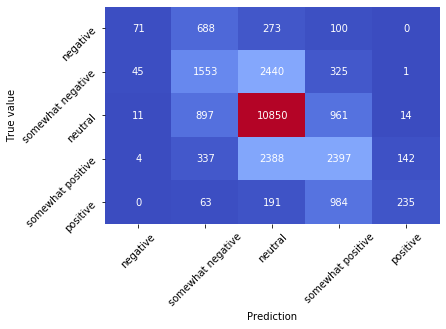


* * * Training * * *
Train Epoch:   2 [     0/ 99878 (0%)]	Loss: 0.952010
Train Epoch:   2 [  5120/ 99878 (5%)]	Loss: 0.937513
Train Epoch:   2 [ 10240/ 99878 (10%)]	Loss: 0.906967
Train Epoch:   2 [ 15360/ 99878 (15%)]	Loss: 0.883869
Train Epoch:   2 [ 20480/ 99878 (20%)]	Loss: 0.911781
Train Epoch:   2 [ 25600/ 99878 (26%)]	Loss: 0.898716
Train Epoch:   2 [ 30720/ 99878 (31%)]	Loss: 0.888860
Train Epoch:   2 [ 35840/ 99878 (36%)]	Loss: 0.880514
Train Epoch:   2 [ 40960/ 99878 (41%)]	Loss: 0.870946
Train Epoch:   2 [ 46080/ 99878 (46%)]	Loss: 0.885086
Train Epoch:   2 [ 51200/ 99878 (51%)]	Loss: 0.853613
Train Epoch:   2 [ 56320/ 99878 (56%)]	Loss: 0.808199
Train Epoch:   2 [ 61440/ 99878 (61%)]	Loss: 0.856182
Train Epoch:   2 [ 66560/ 99878 (66%)]	Loss: 0.867418
Train Epoch:   2 [ 71680/ 99878 (71%)]	Loss: 0.843146
Train Epoch:   2 [ 76800/ 99878 (77%)]	Loss: 0.832428
Train Epoch:   2 [ 81920/ 99878 (82%)]	Loss: 0.835233
Train Epoch:   2 [ 87040/ 99878 (87%)]	Loss: 0.857958
Train Ep

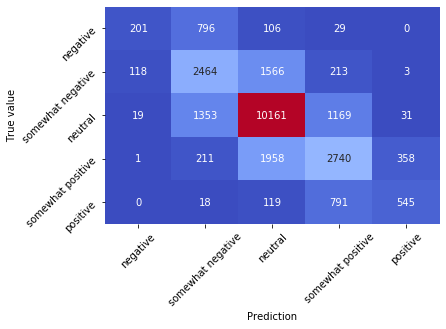


* * * Training * * *
Train Epoch:   3 [     0/ 99878 (0%)]	Loss: 0.754161
Train Epoch:   3 [  5120/ 99878 (5%)]	Loss: 0.704960
Train Epoch:   3 [ 10240/ 99878 (10%)]	Loss: 0.776786
Train Epoch:   3 [ 15360/ 99878 (15%)]	Loss: 0.749768
Train Epoch:   3 [ 20480/ 99878 (20%)]	Loss: 0.746595
Train Epoch:   3 [ 25600/ 99878 (26%)]	Loss: 0.731605
Train Epoch:   3 [ 30720/ 99878 (31%)]	Loss: 0.773941
Train Epoch:   3 [ 35840/ 99878 (36%)]	Loss: 0.735059
Train Epoch:   3 [ 40960/ 99878 (41%)]	Loss: 0.736805
Train Epoch:   3 [ 46080/ 99878 (46%)]	Loss: 0.774454
Train Epoch:   3 [ 51200/ 99878 (51%)]	Loss: 0.734558
Train Epoch:   3 [ 56320/ 99878 (56%)]	Loss: 0.786580
Train Epoch:   3 [ 61440/ 99878 (61%)]	Loss: 0.735778
Train Epoch:   3 [ 66560/ 99878 (66%)]	Loss: 0.737995
Train Epoch:   3 [ 71680/ 99878 (71%)]	Loss: 0.762839
Train Epoch:   3 [ 76800/ 99878 (77%)]	Loss: 0.739704
Train Epoch:   3 [ 81920/ 99878 (82%)]	Loss: 0.768367
Train Epoch:   3 [ 87040/ 99878 (87%)]	Loss: 0.686228
Train Ep

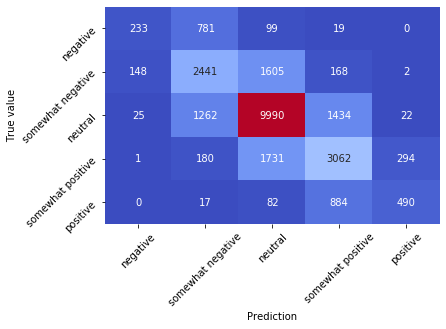


* * * Training * * *
Train Epoch:   4 [     0/ 99878 (0%)]	Loss: 0.641346
Train Epoch:   4 [  5120/ 99878 (5%)]	Loss: 0.633650
Train Epoch:   4 [ 10240/ 99878 (10%)]	Loss: 0.692319
Train Epoch:   4 [ 15360/ 99878 (15%)]	Loss: 0.655741
Train Epoch:   4 [ 20480/ 99878 (20%)]	Loss: 0.684720
Train Epoch:   4 [ 25600/ 99878 (26%)]	Loss: 0.642086
Train Epoch:   4 [ 30720/ 99878 (31%)]	Loss: 0.622667
Train Epoch:   4 [ 35840/ 99878 (36%)]	Loss: 0.667895
Train Epoch:   4 [ 40960/ 99878 (41%)]	Loss: 0.664617
Train Epoch:   4 [ 46080/ 99878 (46%)]	Loss: 0.677776
Train Epoch:   4 [ 51200/ 99878 (51%)]	Loss: 0.656266
Train Epoch:   4 [ 56320/ 99878 (56%)]	Loss: 0.722668
Train Epoch:   4 [ 61440/ 99878 (61%)]	Loss: 0.684030
Train Epoch:   4 [ 66560/ 99878 (66%)]	Loss: 0.677364
Train Epoch:   4 [ 71680/ 99878 (71%)]	Loss: 0.689096
Train Epoch:   4 [ 76800/ 99878 (77%)]	Loss: 0.732757
Train Epoch:   4 [ 81920/ 99878 (82%)]	Loss: 0.679085
Train Epoch:   4 [ 87040/ 99878 (87%)]	Loss: 0.685550
Train Ep

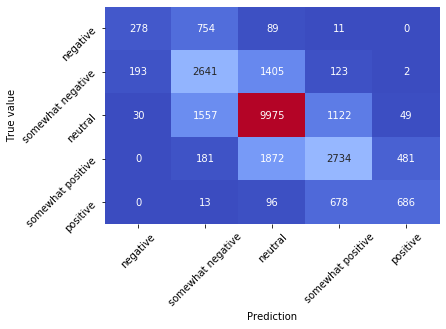


* * * Training * * *
Train Epoch:   5 [     0/ 99878 (0%)]	Loss: 0.530106
Train Epoch:   5 [  5120/ 99878 (5%)]	Loss: 0.563173
Train Epoch:   5 [ 10240/ 99878 (10%)]	Loss: 0.560051
Train Epoch:   5 [ 15360/ 99878 (15%)]	Loss: 0.596462
Train Epoch:   5 [ 20480/ 99878 (20%)]	Loss: 0.589307
Train Epoch:   5 [ 25600/ 99878 (26%)]	Loss: 0.541214
Train Epoch:   5 [ 30720/ 99878 (31%)]	Loss: 0.542301
Train Epoch:   5 [ 35840/ 99878 (36%)]	Loss: 0.582981
Train Epoch:   5 [ 40960/ 99878 (41%)]	Loss: 0.549606
Train Epoch:   5 [ 46080/ 99878 (46%)]	Loss: 0.546836
Train Epoch:   5 [ 51200/ 99878 (51%)]	Loss: 0.536865
Train Epoch:   5 [ 56320/ 99878 (56%)]	Loss: 0.581885
Train Epoch:   5 [ 61440/ 99878 (61%)]	Loss: 0.540299
Train Epoch:   5 [ 66560/ 99878 (66%)]	Loss: 0.539452
Train Epoch:   5 [ 71680/ 99878 (71%)]	Loss: 0.530884
Train Epoch:   5 [ 76800/ 99878 (77%)]	Loss: 0.530444
Train Epoch:   5 [ 81920/ 99878 (82%)]	Loss: 0.547133
Train Epoch:   5 [ 87040/ 99878 (87%)]	Loss: 0.539858
Train Ep

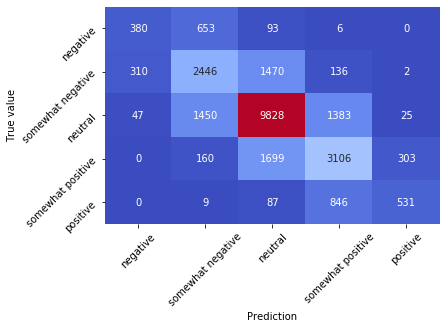


* * * Training * * *
Train Epoch:   6 [     0/ 99878 (0%)]	Loss: 0.561019
Train Epoch:   6 [  5120/ 99878 (5%)]	Loss: 0.478508
Train Epoch:   6 [ 10240/ 99878 (10%)]	Loss: 0.541684
Train Epoch:   6 [ 15360/ 99878 (15%)]	Loss: 0.518378
Train Epoch:   6 [ 20480/ 99878 (20%)]	Loss: 0.527237
Train Epoch:   6 [ 25600/ 99878 (26%)]	Loss: 0.496208
Train Epoch:   6 [ 30720/ 99878 (31%)]	Loss: 0.520411
Train Epoch:   6 [ 35840/ 99878 (36%)]	Loss: 0.531672
Train Epoch:   6 [ 40960/ 99878 (41%)]	Loss: 0.549691
Train Epoch:   6 [ 46080/ 99878 (46%)]	Loss: 0.545494
Train Epoch:   6 [ 51200/ 99878 (51%)]	Loss: 0.505519
Train Epoch:   6 [ 56320/ 99878 (56%)]	Loss: 0.503124
Train Epoch:   6 [ 61440/ 99878 (61%)]	Loss: 0.551225
Train Epoch:   6 [ 66560/ 99878 (66%)]	Loss: 0.517216
Train Epoch:   6 [ 71680/ 99878 (71%)]	Loss: 0.532491
Train Epoch:   6 [ 76800/ 99878 (77%)]	Loss: 0.519918
Train Epoch:   6 [ 81920/ 99878 (82%)]	Loss: 0.553620
Train Epoch:   6 [ 87040/ 99878 (87%)]	Loss: 0.530850
Train Ep

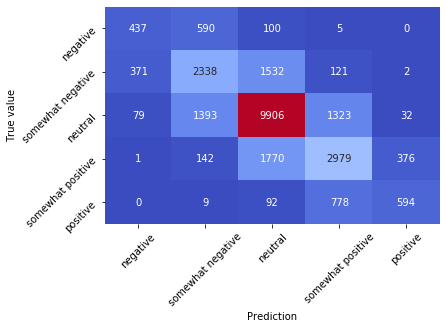


* * * Training * * *
Train Epoch:   7 [     0/ 99878 (0%)]	Loss: 0.544008
Train Epoch:   7 [  5120/ 99878 (5%)]	Loss: 0.501583
Train Epoch:   7 [ 10240/ 99878 (10%)]	Loss: 0.487296
Train Epoch:   7 [ 15360/ 99878 (15%)]	Loss: 0.486863
Train Epoch:   7 [ 20480/ 99878 (20%)]	Loss: 0.511323
Train Epoch:   7 [ 25600/ 99878 (26%)]	Loss: 0.499293
Train Epoch:   7 [ 30720/ 99878 (31%)]	Loss: 0.479957
Train Epoch:   7 [ 35840/ 99878 (36%)]	Loss: 0.504282
Train Epoch:   7 [ 40960/ 99878 (41%)]	Loss: 0.485700
Train Epoch:   7 [ 46080/ 99878 (46%)]	Loss: 0.502963
Train Epoch:   7 [ 51200/ 99878 (51%)]	Loss: 0.468552
Train Epoch:   7 [ 56320/ 99878 (56%)]	Loss: 0.475881
Train Epoch:   7 [ 61440/ 99878 (61%)]	Loss: 0.494101
Train Epoch:   7 [ 66560/ 99878 (66%)]	Loss: 0.511961
Train Epoch:   7 [ 71680/ 99878 (71%)]	Loss: 0.475203
Train Epoch:   7 [ 76800/ 99878 (77%)]	Loss: 0.498286
Train Epoch:   7 [ 81920/ 99878 (82%)]	Loss: 0.500921
Train Epoch:   7 [ 87040/ 99878 (87%)]	Loss: 0.531497
Train Ep

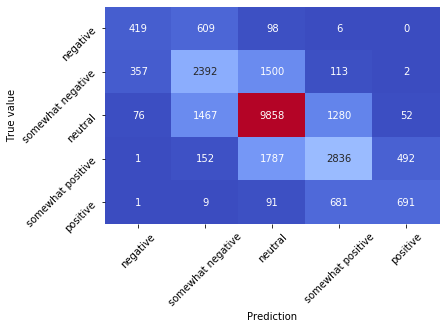


* * * Training * * *
Train Epoch:   8 [     0/ 99878 (0%)]	Loss: 0.470770
Train Epoch:   8 [  5120/ 99878 (5%)]	Loss: 0.464310
Train Epoch:   8 [ 10240/ 99878 (10%)]	Loss: 0.451110
Train Epoch:   8 [ 15360/ 99878 (15%)]	Loss: 0.473777
Train Epoch:   8 [ 20480/ 99878 (20%)]	Loss: 0.454769
Train Epoch:   8 [ 25600/ 99878 (26%)]	Loss: 0.490246
Train Epoch:   8 [ 30720/ 99878 (31%)]	Loss: 0.487049
Train Epoch:   8 [ 35840/ 99878 (36%)]	Loss: 0.480553
Train Epoch:   8 [ 40960/ 99878 (41%)]	Loss: 0.478428
Train Epoch:   8 [ 46080/ 99878 (46%)]	Loss: 0.495035
Train Epoch:   8 [ 51200/ 99878 (51%)]	Loss: 0.486278
Train Epoch:   8 [ 56320/ 99878 (56%)]	Loss: 0.503957
Train Epoch:   8 [ 61440/ 99878 (61%)]	Loss: 0.466737
Train Epoch:   8 [ 66560/ 99878 (66%)]	Loss: 0.452594
Train Epoch:   8 [ 71680/ 99878 (71%)]	Loss: 0.490419
Train Epoch:   8 [ 76800/ 99878 (77%)]	Loss: 0.480142
Train Epoch:   8 [ 81920/ 99878 (82%)]	Loss: 0.497546
Train Epoch:   8 [ 87040/ 99878 (87%)]	Loss: 0.474166
Train Ep

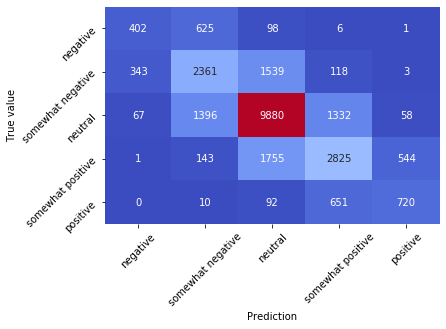


* * * Training * * *
Train Epoch:   9 [     0/ 99878 (0%)]	Loss: 0.471913
Train Epoch:   9 [  5120/ 99878 (5%)]	Loss: 0.457769
Train Epoch:   9 [ 10240/ 99878 (10%)]	Loss: 0.437639
Train Epoch:   9 [ 15360/ 99878 (15%)]	Loss: 0.442257
Train Epoch:   9 [ 20480/ 99878 (20%)]	Loss: 0.457982
Train Epoch:   9 [ 25600/ 99878 (26%)]	Loss: 0.453689
Train Epoch:   9 [ 30720/ 99878 (31%)]	Loss: 0.438120
Train Epoch:   9 [ 35840/ 99878 (36%)]	Loss: 0.423248
Train Epoch:   9 [ 40960/ 99878 (41%)]	Loss: 0.445150
Train Epoch:   9 [ 46080/ 99878 (46%)]	Loss: 0.452779
Train Epoch:   9 [ 51200/ 99878 (51%)]	Loss: 0.459382
Train Epoch:   9 [ 56320/ 99878 (56%)]	Loss: 0.465339
Train Epoch:   9 [ 61440/ 99878 (61%)]	Loss: 0.492906
Train Epoch:   9 [ 66560/ 99878 (66%)]	Loss: 0.446761
Train Epoch:   9 [ 71680/ 99878 (71%)]	Loss: 0.467635
Train Epoch:   9 [ 76800/ 99878 (77%)]	Loss: 0.412788
Train Epoch:   9 [ 81920/ 99878 (82%)]	Loss: 0.445053
Train Epoch:   9 [ 87040/ 99878 (87%)]	Loss: 0.424931
Train Ep

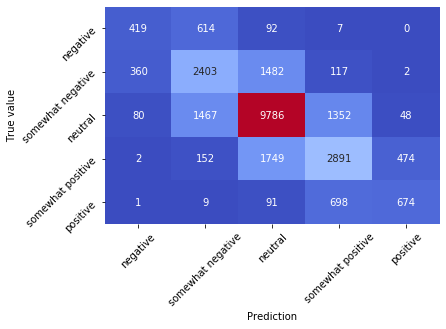


* * * Training * * *
Train Epoch:  10 [     0/ 99878 (0%)]	Loss: 0.440014
Train Epoch:  10 [  5120/ 99878 (5%)]	Loss: 0.500848
Train Epoch:  10 [ 10240/ 99878 (10%)]	Loss: 0.478058
Train Epoch:  10 [ 15360/ 99878 (15%)]	Loss: 0.448415
Train Epoch:  10 [ 20480/ 99878 (20%)]	Loss: 0.463187
Train Epoch:  10 [ 25600/ 99878 (26%)]	Loss: 0.469619
Train Epoch:  10 [ 30720/ 99878 (31%)]	Loss: 0.437966
Train Epoch:  10 [ 35840/ 99878 (36%)]	Loss: 0.435210
Train Epoch:  10 [ 40960/ 99878 (41%)]	Loss: 0.445798
Train Epoch:  10 [ 46080/ 99878 (46%)]	Loss: 0.452809
Train Epoch:  10 [ 51200/ 99878 (51%)]	Loss: 0.404272
Train Epoch:  10 [ 56320/ 99878 (56%)]	Loss: 0.485958
Train Epoch:  10 [ 61440/ 99878 (61%)]	Loss: 0.449783
Train Epoch:  10 [ 66560/ 99878 (66%)]	Loss: 0.443847
Train Epoch:  10 [ 71680/ 99878 (71%)]	Loss: 0.475024
Train Epoch:  10 [ 76800/ 99878 (77%)]	Loss: 0.453053
Train Epoch:  10 [ 81920/ 99878 (82%)]	Loss: 0.477419
Train Epoch:  10 [ 87040/ 99878 (87%)]	Loss: 0.436896
Train Ep

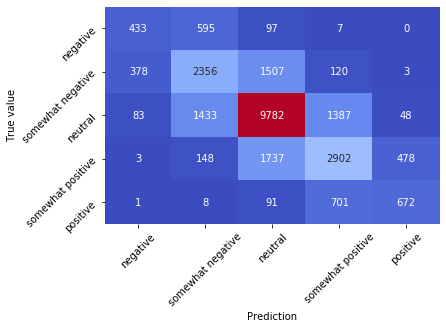


* * * Training * * *
Train Epoch:  11 [     0/ 99878 (0%)]	Loss: 0.444299
Train Epoch:  11 [  5120/ 99878 (5%)]	Loss: 0.466219
Train Epoch:  11 [ 10240/ 99878 (10%)]	Loss: 0.423671
Train Epoch:  11 [ 15360/ 99878 (15%)]	Loss: 0.439949
Train Epoch:  11 [ 20480/ 99878 (20%)]	Loss: 0.416117
Train Epoch:  11 [ 25600/ 99878 (26%)]	Loss: 0.466418
Train Epoch:  11 [ 30720/ 99878 (31%)]	Loss: 0.474312
Train Epoch:  11 [ 35840/ 99878 (36%)]	Loss: 0.452595
Train Epoch:  11 [ 40960/ 99878 (41%)]	Loss: 0.447934
Train Epoch:  11 [ 46080/ 99878 (46%)]	Loss: 0.433159
Train Epoch:  11 [ 51200/ 99878 (51%)]	Loss: 0.476126
Train Epoch:  11 [ 56320/ 99878 (56%)]	Loss: 0.384995
Train Epoch:  11 [ 61440/ 99878 (61%)]	Loss: 0.457848
Train Epoch:  11 [ 66560/ 99878 (66%)]	Loss: 0.410508
Train Epoch:  11 [ 71680/ 99878 (71%)]	Loss: 0.470702
Train Epoch:  11 [ 76800/ 99878 (77%)]	Loss: 0.447344
Train Epoch:  11 [ 81920/ 99878 (82%)]	Loss: 0.484867
Train Epoch:  11 [ 87040/ 99878 (87%)]	Loss: 0.446471
Train Ep

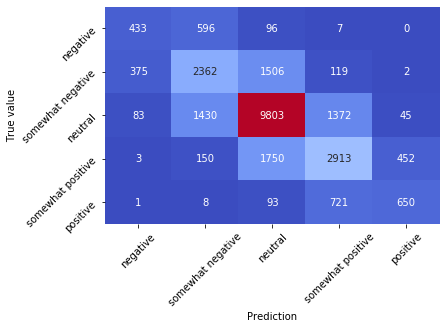


* * * Training * * *
Train Epoch:  12 [     0/ 99878 (0%)]	Loss: 0.454279
Train Epoch:  12 [  5120/ 99878 (5%)]	Loss: 0.443802
Train Epoch:  12 [ 10240/ 99878 (10%)]	Loss: 0.453390
Train Epoch:  12 [ 15360/ 99878 (15%)]	Loss: 0.435797
Train Epoch:  12 [ 20480/ 99878 (20%)]	Loss: 0.419642
Train Epoch:  12 [ 25600/ 99878 (26%)]	Loss: 0.435331
Train Epoch:  12 [ 30720/ 99878 (31%)]	Loss: 0.436039
Train Epoch:  12 [ 35840/ 99878 (36%)]	Loss: 0.506095
Train Epoch:  12 [ 40960/ 99878 (41%)]	Loss: 0.427017
Train Epoch:  12 [ 46080/ 99878 (46%)]	Loss: 0.472774
Train Epoch:  12 [ 51200/ 99878 (51%)]	Loss: 0.439743
Train Epoch:  12 [ 56320/ 99878 (56%)]	Loss: 0.485617
Train Epoch:  12 [ 61440/ 99878 (61%)]	Loss: 0.419884
Train Epoch:  12 [ 66560/ 99878 (66%)]	Loss: 0.416899
Train Epoch:  12 [ 71680/ 99878 (71%)]	Loss: 0.406686
Train Epoch:  12 [ 76800/ 99878 (77%)]	Loss: 0.418706
Train Epoch:  12 [ 81920/ 99878 (82%)]	Loss: 0.413765
Train Epoch:  12 [ 87040/ 99878 (87%)]	Loss: 0.425969
Train Ep

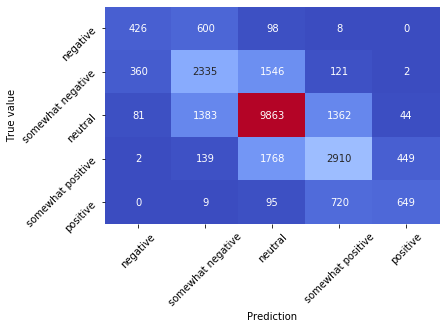

In [12]:
history = train(
    model=model, train_loader=train_loader, test_loader=valid_loader, classes=classes,
    device=device, optimizer=optimizer, lr_scheduler=lr_scheduler,
    nb_epochs=nb_epochs, log_interval=log_interval
)

### Resultados do treino

In [13]:
print('Max val acc: {:.2f}%'.format(max(history['val_acc'])))

Max val acc: 65.33%


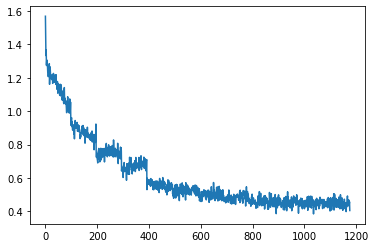

In [14]:
plt.plot(history['train_loss'])
plt.show()

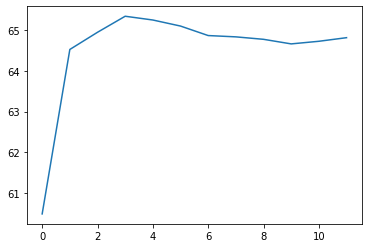

In [15]:
plt.plot(history['val_acc'])
plt.show()

### Teste

In [16]:
test_loader = get_loaders(
    data_path=data_path, 
    batch_size=batch_size, 
    splits=['test'],
)[0]

Test set: Average loss: 0.0011, Accuracy: 20315/31212 (65.09%)



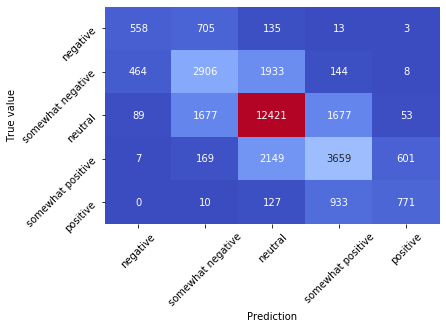

65.0871459694989

In [18]:
test(model, device, test_loader, classes=classes)